# Capstone Project - Apple Quality (Explore the World of Fruits)

**Overview**: This project focusses on predicting if the quality of an apple is 'good' or 'bad' based on different features of the fruit. Features that are considered as part of data anlaysis and modeling to predict the quality of the fruit are its size, weight, sweetness, crunchiness, juiciness, ripeness and acidity.

Goal of the project is to run classification models, Logisitic Regression, KNN, Decision Trees and SVM, and analyze the key metrics from each model to predict the quality of the fruit.

### Getting Started

Dataset comes from Kaggle [link](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data). This dataset was provided by an American agriculture company. Data has been scaled and cleaned for ease of use. Potential use cases of the data are:
1. Fruit Classification: Classifying fruits based on given features.
2. Quality Prediction: Predict the quality of the fruit based on given features.

### Step 1: Read and Understand the Data

Import necassary libraries and aliased correctly. Using pandas read the dataset that is downloaded from Kaggle and assign a meaningful name to the dataframe. 

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

import time
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Create the dataframe
apple_quality = pd.read_csv('data/apple_quality.csv', sep = ',')

In [146]:
apple_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [144]:
apple_quality.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [147]:
apple_quality.shape

(4000, 9)

In [148]:
apple_quality = apple_quality.dropna()

In [188]:
# Indicates that there are no null values in the dataframe
apple_quality.shape

(4000, 8)

In [189]:
# Examining how the data is distributed
apple_quality['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [193]:
apple_quality.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

### Step 2: Understanding the Features

```
Input variables (Apple Quality data):
1. A_id: Unique identifier for each fruit (numeric)
2. Size: Size of the fruit (numeric)
3. Weight: Weight of the fruit (numeric)
4. Sweetness: Degree of sweetness of the fruit (numeric)
5. Crunchiness: Texture indicating the crunchiness of the fruit (numeric)
6. Juiciness: Level of juiciness of the fruit (numeric)
7. Ripeness: Stage of ripeness of the fruit (numeric)
8. Acidity: Acidity level of the fruit (numeric)

Output variable (desired target):
9. Quality: Overall quality of the fruit (Binary - good, bad)


```



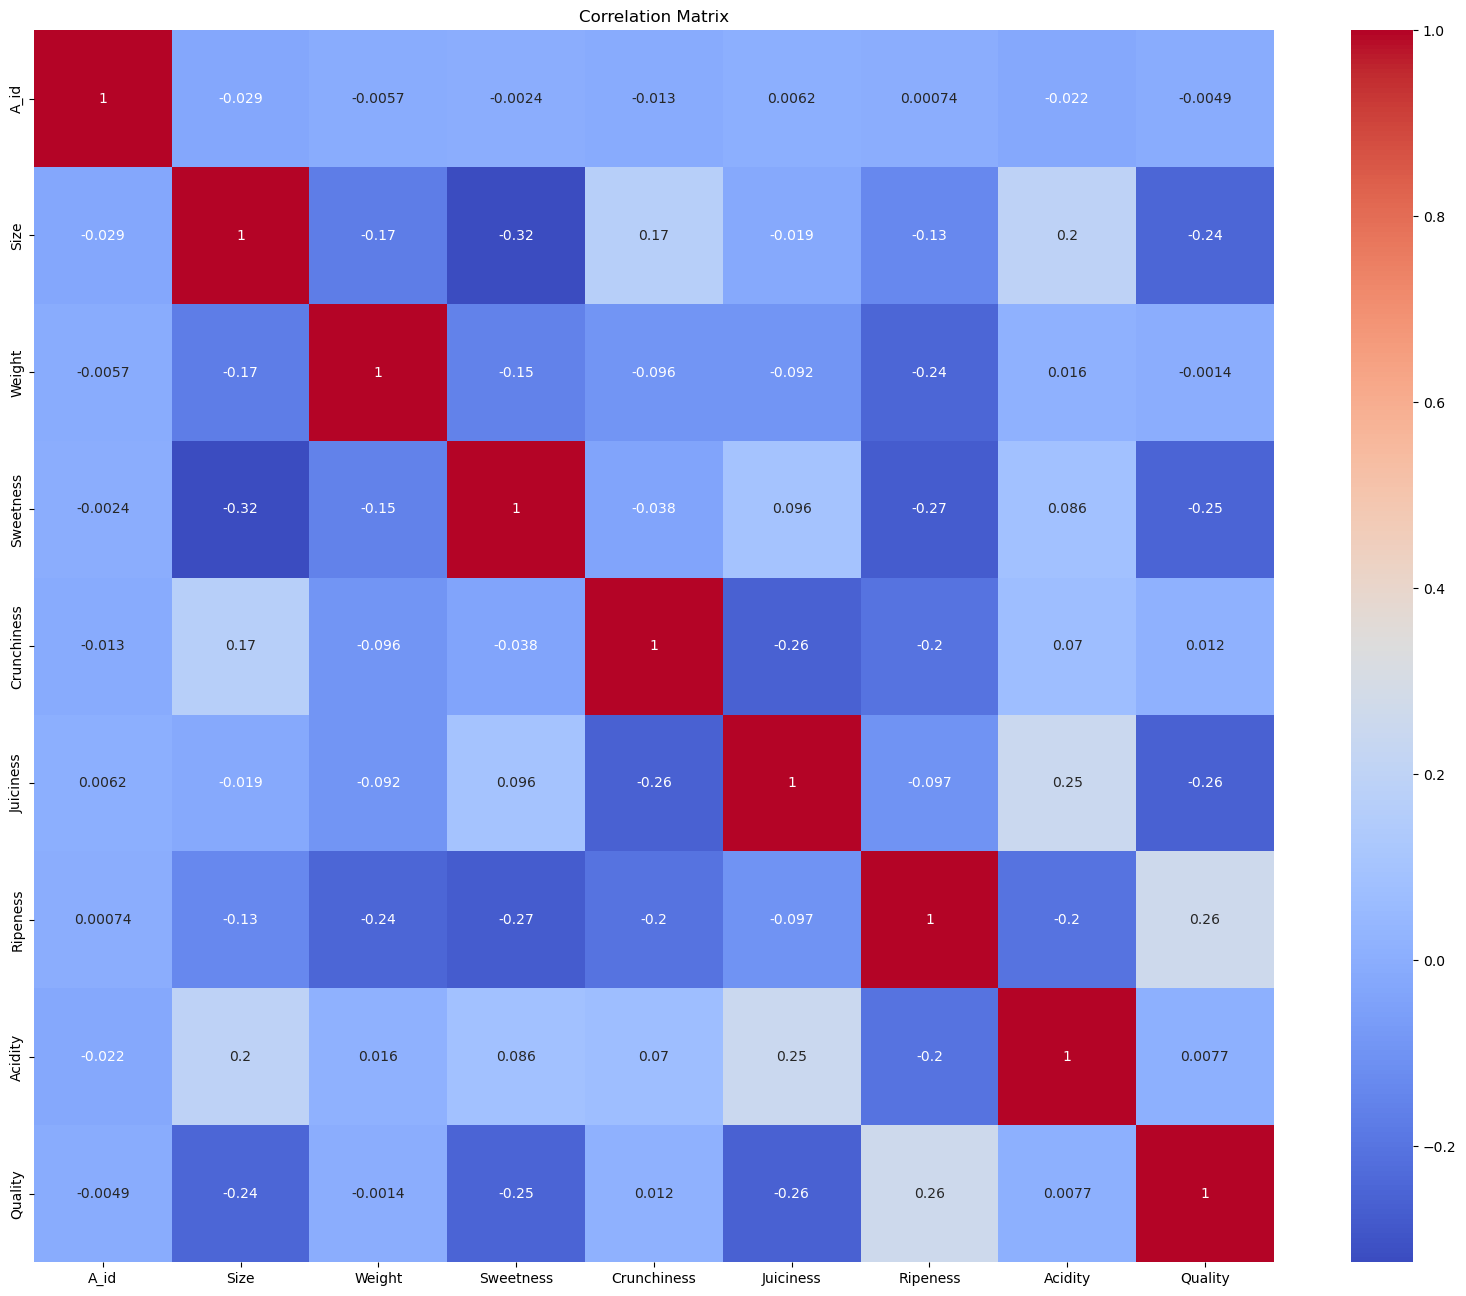

In [78]:
# Create a copy of the dataframe
apple_quality_heatmap = apple_quality.copy()

# Convert categorical columns to numeric columns
for col in apple_quality_heatmap.select_dtypes(include='object').columns:
    apple_quality_heatmap[col], _ = pd.factorize(apple_quality_heatmap[col])

# Compute the correlation matrix
corr_matrix = apple_quality_heatmap.corr()

# Plot the heatmap matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

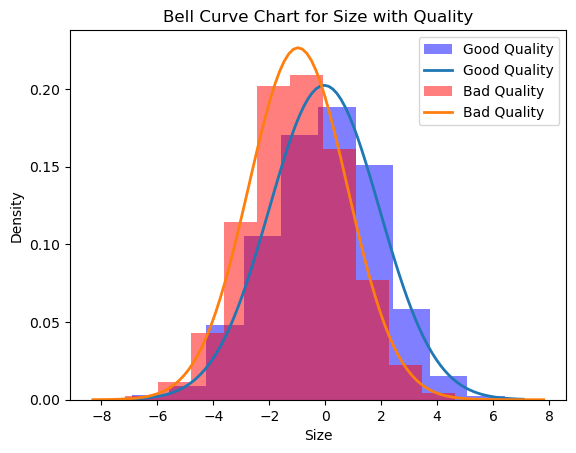

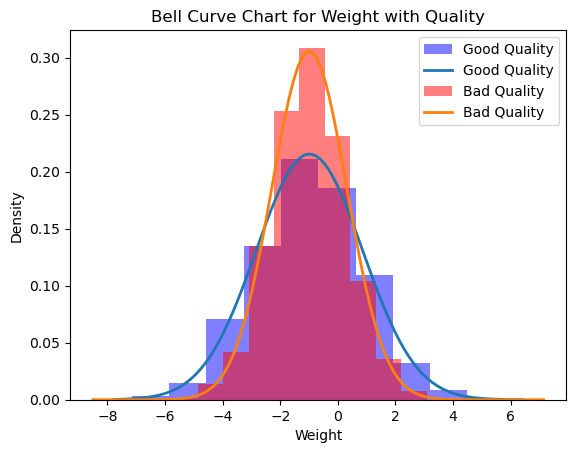

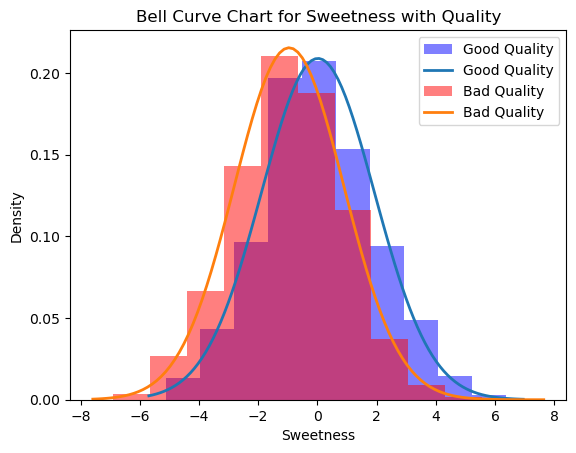

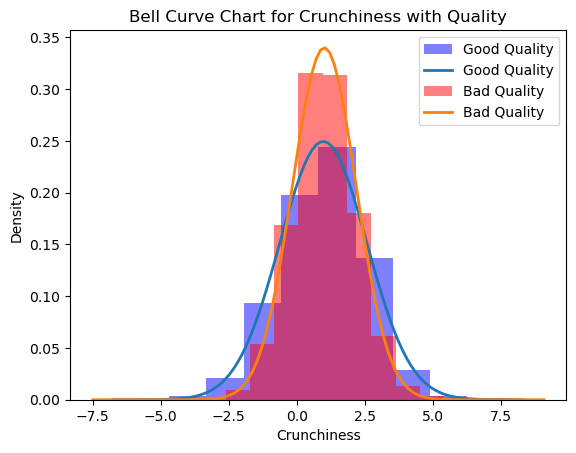

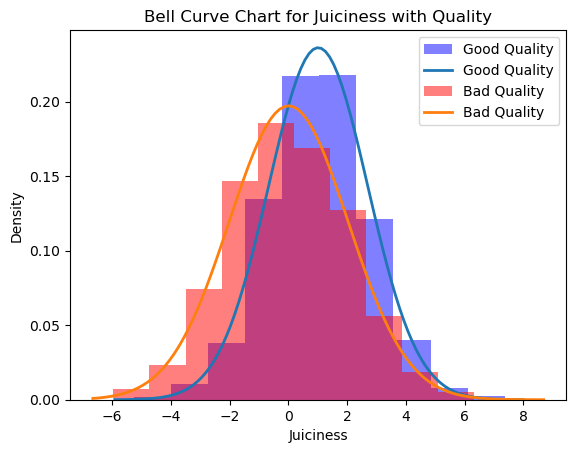

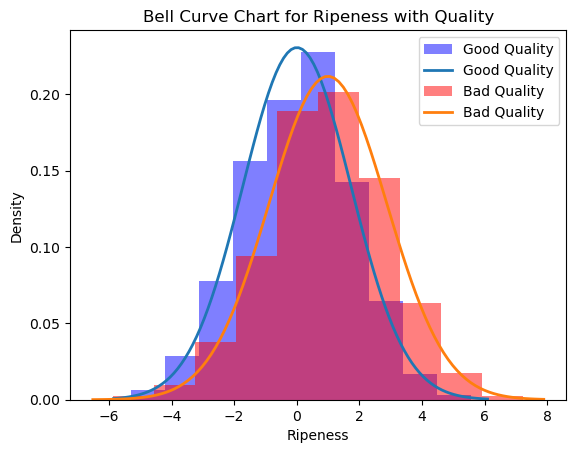

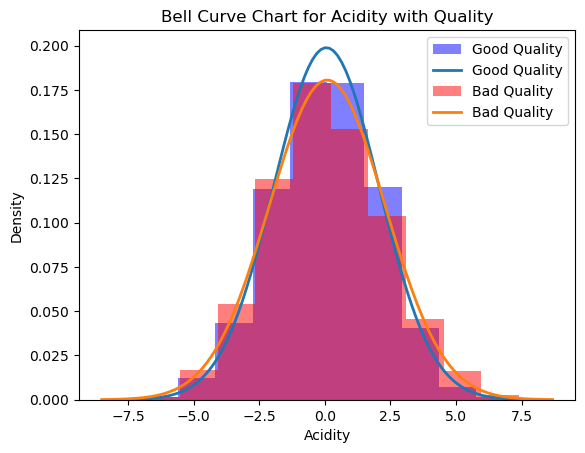

In [200]:
# Get the data for each feature and quality
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
quality_values = ['good', 'bad']

for feature in features:
    fig, ax = plt.subplots()
    for quality in quality_values:
        data = apple_quality[apple_quality['Quality'] == quality][feature]
        color = 'b' if quality == 'good' else 'r' 
        
        plt.hist(data, bins=10, density=True, alpha=0.5, color=color, label=f'{quality.capitalize()} Quality')
        
        mu, std = norm.fit(data)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        ax.plot(x, p, label=f'{quality.capitalize()} Quality', linewidth=2)
        
    
    # Set the labels and title
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Density')
    ax.set_title(f'Bell Curve Chart for {feature.capitalize()} with Quality')
    
    # Add legend
    ax.legend()

plt.show()

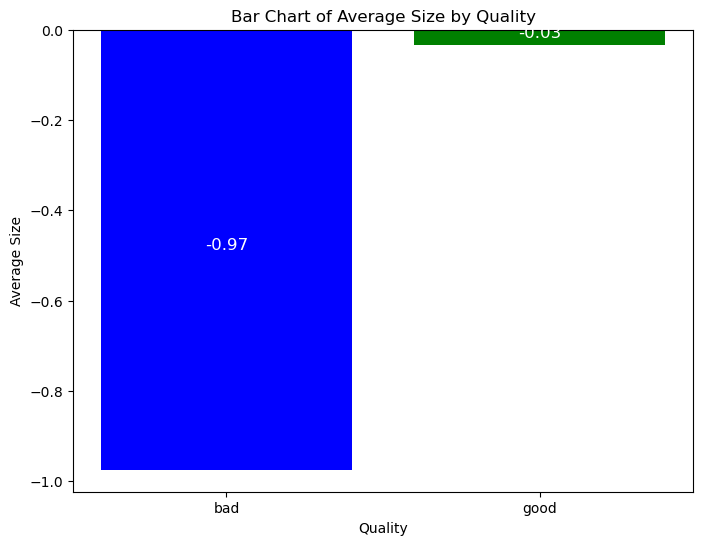

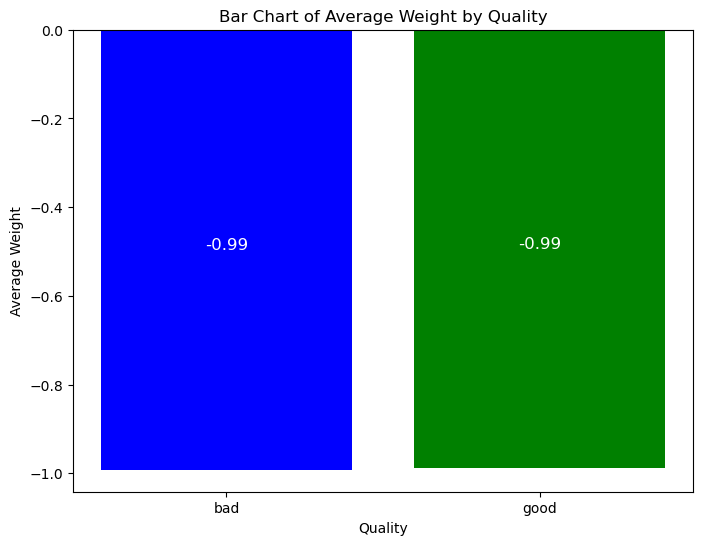

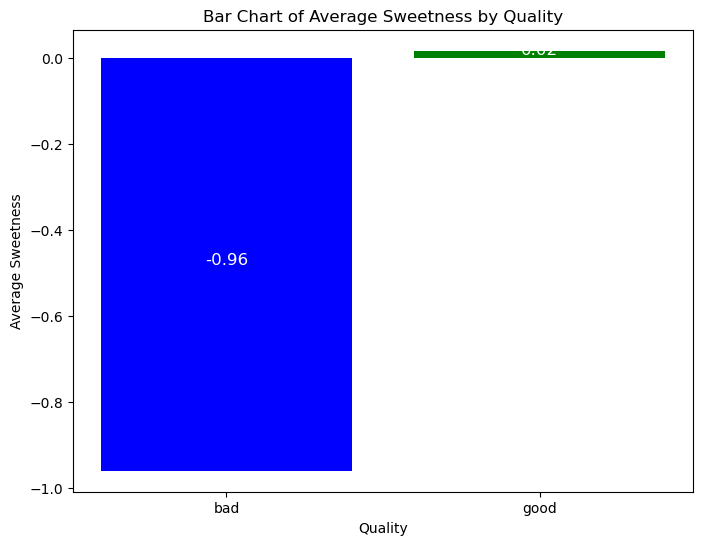

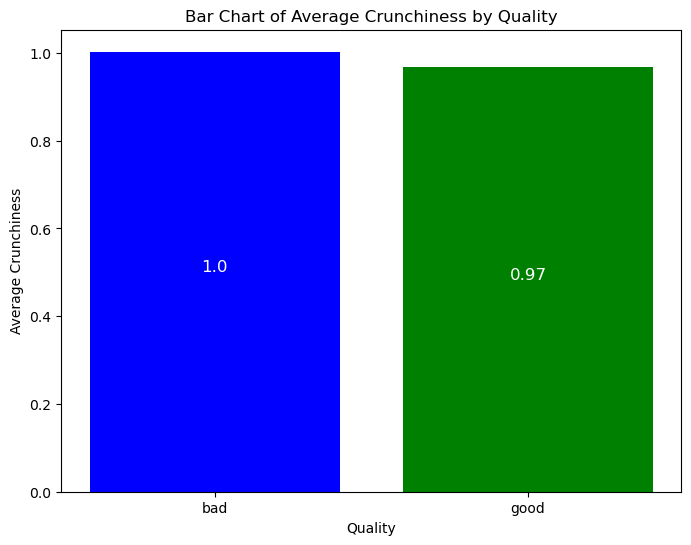

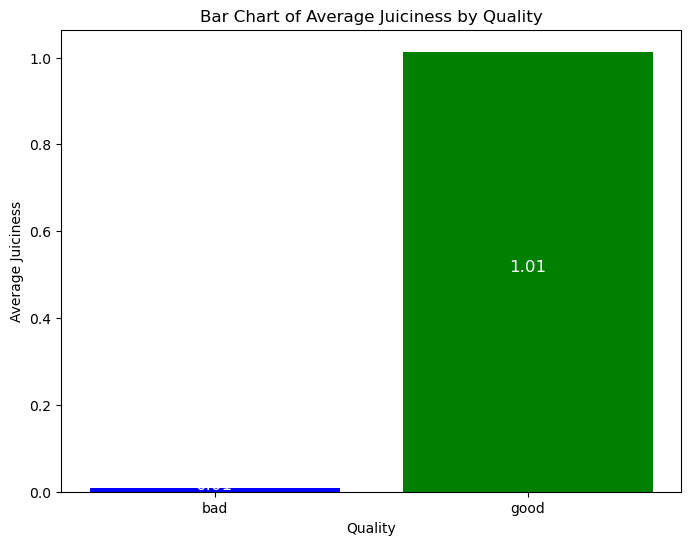

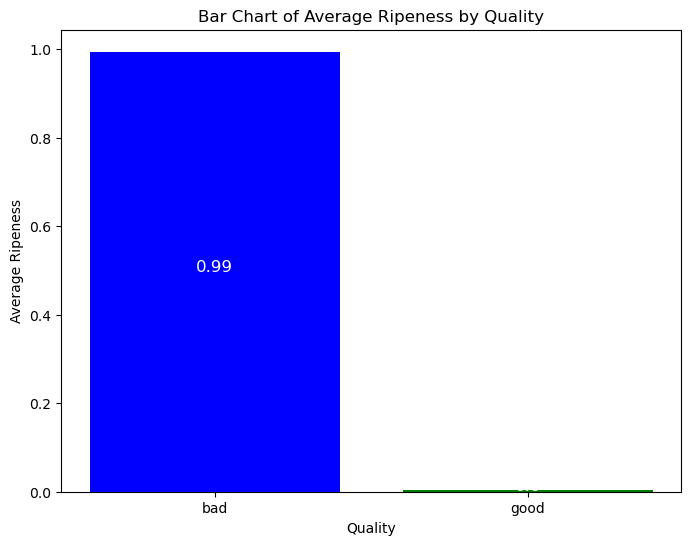

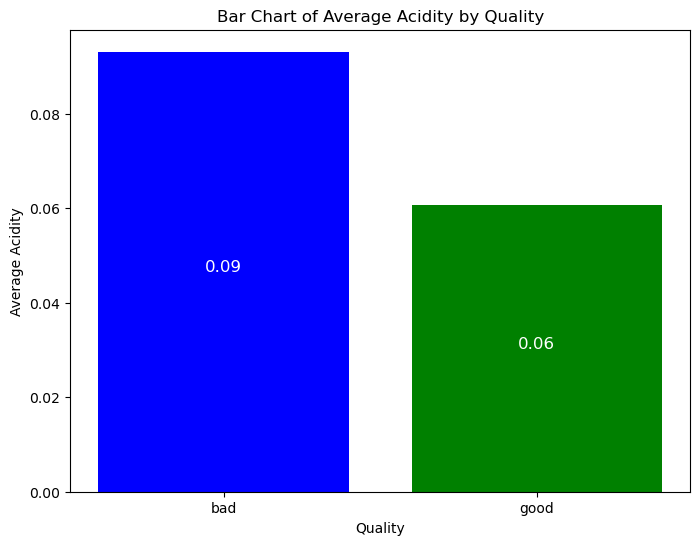

In [201]:
# Get the average of each feature for each quality
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
quality_values = ['good', 'bad']

for feature in features:
    feature_avg = apple_quality.groupby('Quality')[feature].mean()

    # Create a bar chart of the data
    colors = ['blue', 'green']
    plt.figure(figsize=(8, 6))
    plt.bar(feature_avg.index, feature_avg.values, color=colors)

    # Add the values on top of each bar
    for i, v in enumerate(feature_avg.values):
        plt.text(i, v/2, str(round(v, 2)), ha='center', color='white', fontsize=12)

    # Set the labels and title
    plt.xlabel('Quality')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.title(f'Bar Chart of Average {feature.capitalize()} by Quality')

    plt.show()

### Step 3: Preparing the Data

After understanding and examining the data, to prepare for running models, dropping A_id field as it is just a unique identifier for each apple and has no correlation with Quality feature. To ensure we are able to run models, converted Quality features values (good, bad) to corrospond to numeric values (1 & 0 respectively)

In [184]:
#Dropping Apple Id features as it has no correlation with Quality. It is just a unique identifier
apple_quality = apple_quality.drop('A_id', axis=1)

In [159]:
apple_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


In [185]:
# Convert the 'Quality' column to binary labels
apple_quality['Quality'] = apple_quality['Quality'].replace({'good': 1, 'bad': 0})

### Step 4: Train/Test Split

Split the prepared data it into a train and test set (70/30 split).

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(apple_quality.drop('Quality', axis=1), apple_quality['Quality'], test_size=0.3, random_state=42)

### Step 5: Model Comparisons

Run different classification models on the train dataset then run the models on test set to calculate accuracy, precision, recall and f1 scores for each model. Finally, present the results of the model in a tabular form and a graph for easy visualization.

Model                  Accuracy    Precision    Recall    F1 Score
-------------------  ----------  -----------  --------  ----------
Logistic Regression    0.7525       0.753268  0.759473    0.756358
KNN                    0.901667     0.902801  0.902801    0.902801
Decision Tree          0.798333     0.761087  0.876442    0.814701
SVM                    0.914167     0.930034  0.897858    0.913663


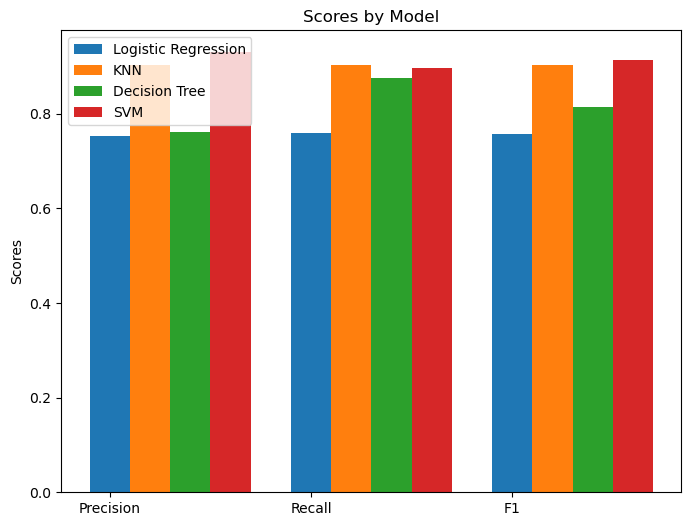

In [257]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC())
]

# Define the hyperparameters for Grid Search
params = [
    {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    {'n_neighbors': [3, 5, 7]},
    {'max_depth': [3, 5, 7]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
]

# Train and evaluate each model using cross-validation and Grid Search
results = []
for name, model in models:
    if name == 'Logistic Regression':
        clf = GridSearchCV(model, params[0], cv=5)
    elif name == 'KNN':
        clf = GridSearchCV(model, params[1], cv=5)
    elif name == 'Decision Tree':
        clf = GridSearchCV(model, params[2], cv=5)
    else:
        clf = GridSearchCV(model, params[3], cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
    results.append((name, accuracy, precision[1], recall[1], f1[1]))
    
# Print the scores for each model in a tabular format using tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
table = tabulate(results, headers=headers)
print(table)

# Create a chart for Precision, Recall, and F1 scores for each model
labels = ['Precision', 'Recall', 'F1']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, (name, _, precision, recall, f1) in enumerate(results):
    rects1 = ax.bar(x + i*width, [precision, recall, f1], width, label=name)

ax.set_ylabel('Scores')
ax.set_title('Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Print the best parameters for each of the model

In [258]:
# Print the best parameters for each model
print("Best Parameters:")
for name, params in best_params:
    print(name + ": " + str(params))

Best Parameters:
Logistic Regression: {'C': 10, 'penalty': 'l2'}
KNN: {'n_neighbors': 7}
Decision Tree: {'max_depth': 7}
SVM: {'C': 10, 'kernel': 'rbf'}


### Compute the confusion matrix and print the charts.

Model                Confusion Matrix
-------------------  ------------------
Logistic Regression  [[442 151]
                      [146 461]]
KNN                  [[534  59]
                      [ 59 548]]
Decision Tree        [[423 170]
                      [ 74 533]]
SVM                  [[552  41]
                      [ 62 545]]


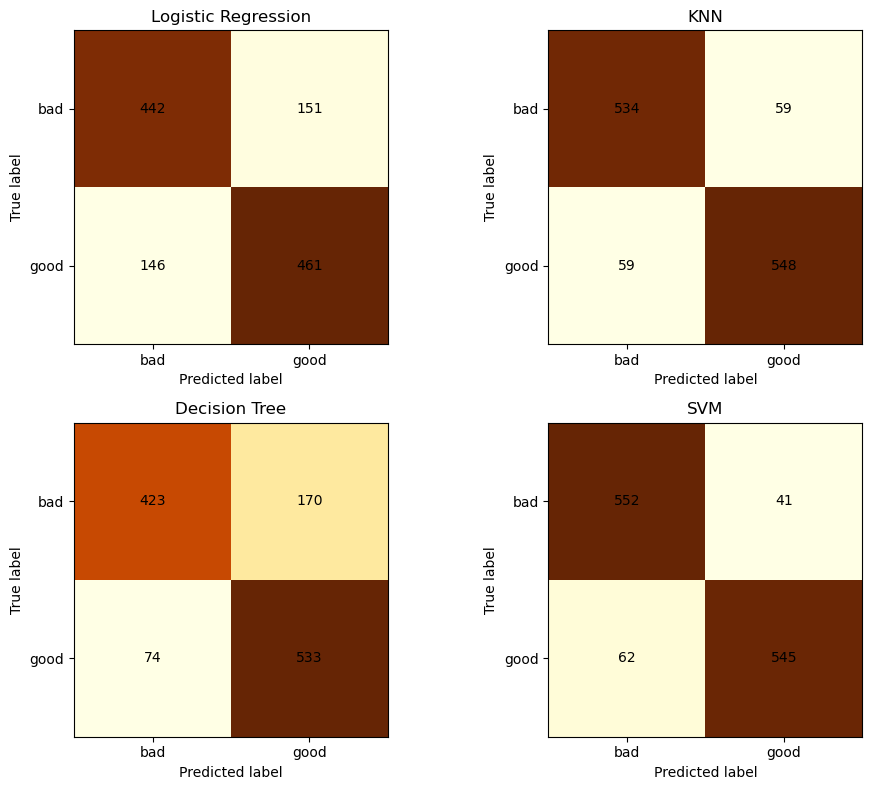

In [260]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC())
]

# Define the hyperparameters for Grid Search
params = [
    {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    {'n_neighbors': [3, 5, 7]},
    {'max_depth': [3, 5, 7]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
]

results = []
for i, (name, model) in enumerate(models):
    clf = GridSearchCV(model, params[i], cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results.append((name, cm))

# Print the scores and confusion matrix for each model in a tabular format using tabulate
headers = ['Model', 'Confusion Matrix']
table = []
for name, cm in results:
    table.append([name, cm])
    table.append(['', ''])
table = tabulate(table, headers=headers)
print(table)

# Create a chart for Precision, Recall, and F1 scores for each model
labels = ['Precision', 'Recall', 'F1']
x = np.arange(len(labels))
width = 0.2

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, (_, cm) in enumerate(results):
    row = i // 2
    col = i % 2
    axs[row][col].imshow(cm, cmap='YlOrBr')
    axs[row][col].set_title(models[i][0])
    axs[row][col].set_xticks([0, 1])
    axs[row][col].set_yticks([0, 1])
    axs[row][col].set_xticklabels(['bad', 'good'])
    axs[row][col].set_yticklabels(['bad', 'good'])
    axs[row][col].set_xlabel('Predicted label')
    axs[row][col].set_ylabel('True label')
    for i in range(2):
        for j in range(2):
            axs[row][col].text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.tight_layout()

plt.show()

### Problem 6: Improving the Model

Now that we have some built the models and computed the best parameters for each of our models, we will try to improve the models. We will do Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.

Model                  Accuracy    Precision    Recall    F1 Score
-------------------  ----------  -----------  --------  ----------
Logistic Regression    0.7525       0.753268  0.759473    0.756358
KNN                    0.901667     0.902801  0.902801    0.902801
Decision Tree          0.796667     0.759657  0.874794    0.81317
SVM                    0.914167     0.930034  0.897858    0.913663


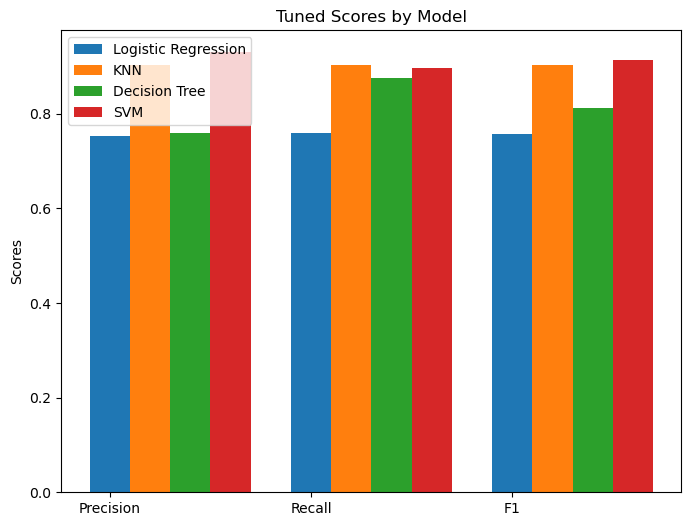

In [262]:
# Retrain the models with the best parameters and evaluate their performance
results_tuned = []
for i, (name, model) in enumerate(models):
    if name == 'Logistic Regression':
        clf = LogisticRegression(C=best_params[i][1]['C'], penalty=best_params[i][1]['penalty'])
    elif name == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=best_params[i][1]['n_neighbors'])
    elif name == 'Decision Tree':
        clf = DecisionTreeClassifier(max_depth=best_params[i][1]['max_depth'])
    else:
        clf = SVC(C=best_params[i][1]['C'], kernel=best_params[i][1]['kernel'])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results_tuned.append((name, accuracy, precision[1], recall[1], f1[1]))
    
    
# Print the scores for each model in a tabular format using tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
table = tabulate(results_tuned, headers=headers)
print(table)

# Create a chart for Precision, Recall, and F1 scores for each model
labels = ['Precision', 'Recall', 'F1']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, (name, _, precision, recall, f1) in enumerate(results_tuned):
    rects1 = ax.bar(x + i*width, [precision, recall, f1], width, label=name)

ax.set_ylabel('Scores')
ax.set_title('Tuned Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Model                Accuracy            Precision           Recall              F1 Score            Confusion Matrix
-------------------  ------------------  ------------------  ------------------  ------------------  ------------------
Logistic Regression  0.7525              0.7532679738562091  0.7594728171334432  0.756357670221493   [[442 151]
                                                                                                      [146 461]]
KNN                  0.9016666666666666  0.9028006589785832  0.9028006589785832  0.9028006589785832  [[534  59]
                                                                                                      [ 59 548]]
Decision Tree        0.7983333333333333  0.7610872675250357  0.8764415156507414  0.8147013782542112  [[426 167]
                                                                                                      [ 75 532]]
SVM                  0.9141666666666667  0.9300341296928327  0.8978583196046128  0.9136

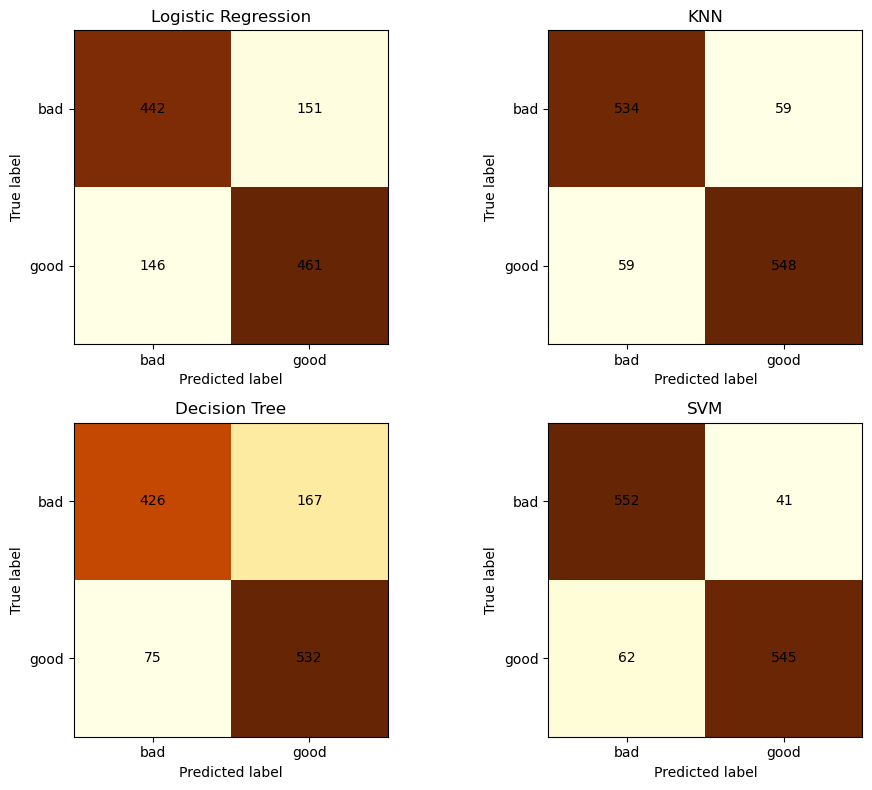

In [249]:
# Print the scores and confusion matrix for each model in a tabular format using tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Confusion Matrix']
table = []
for name, accuracy, precision, recall, f1, cm in results_tuned:
    table.append([name, accuracy, precision, recall, f1, cm])
    table.append(['', '', '', '', '', ''])
table = tabulate(table, headers=headers)
print(table)

# Create a chart for Precision, Recall, and F1 scores for each model
labels = ['Precision', 'Recall', 'F1']
x = np.arange(len(labels))
width = 0.2

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, (name, _, _, _, _, cm) in enumerate(results_tuned):
    row = i // 2
    col = i % 2
    axs[row][col].imshow(cm, cmap='YlOrBr')
    axs[row][col].set_title(name)
    axs[row][col].set_xticks([0, 1])
    axs[row][col].set_yticks([0, 1])
    axs[row][col].set_xticklabels(['bad', 'good'])
    axs[row][col].set_yticklabels(['bad', 'good'])
    axs[row][col].set_xlabel('Predicted label')
    axs[row][col].set_ylabel('True label')
    for i in range(2):
        for j in range(2):
            axs[row][col].text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.tight_layout()

plt.show()